## ÎùºÏù¥Î∏åÎü¨Î¶¨ 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

## Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [15]:
import pandas as pd

raw_url = "https://raw.githubusercontent.com/upul/WhiteBoard/master/data/daily-minimum-temperatures-in-me.csv"

# CSV ÏùΩÍ∏∞
df = pd.read_csv(
    raw_url,
    quotechar='"',
    on_bad_lines='skip',
    parse_dates=['Date'],
    index_col='Date'
)
df.rename(columns={
    'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'Temp'
}, inplace=True)

df.head()

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

In [16]:
ts = df['Temp']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: object

In [17]:
ts = pd.to_numeric(ts, errors='coerce') 
print(ts.dtypes)

float64


## Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
- Î™®Îëê ÏÇ≠Ï†ú‚úÖ
- Î≥¥Í∞Ñ 

In [18]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# print("Í≤∞Ï∏°Ïπò Í∞úÏàò:", ts.isna().sum())

In [19]:
# ts = ts.dropna()

## ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Î∂ÑÏÑù

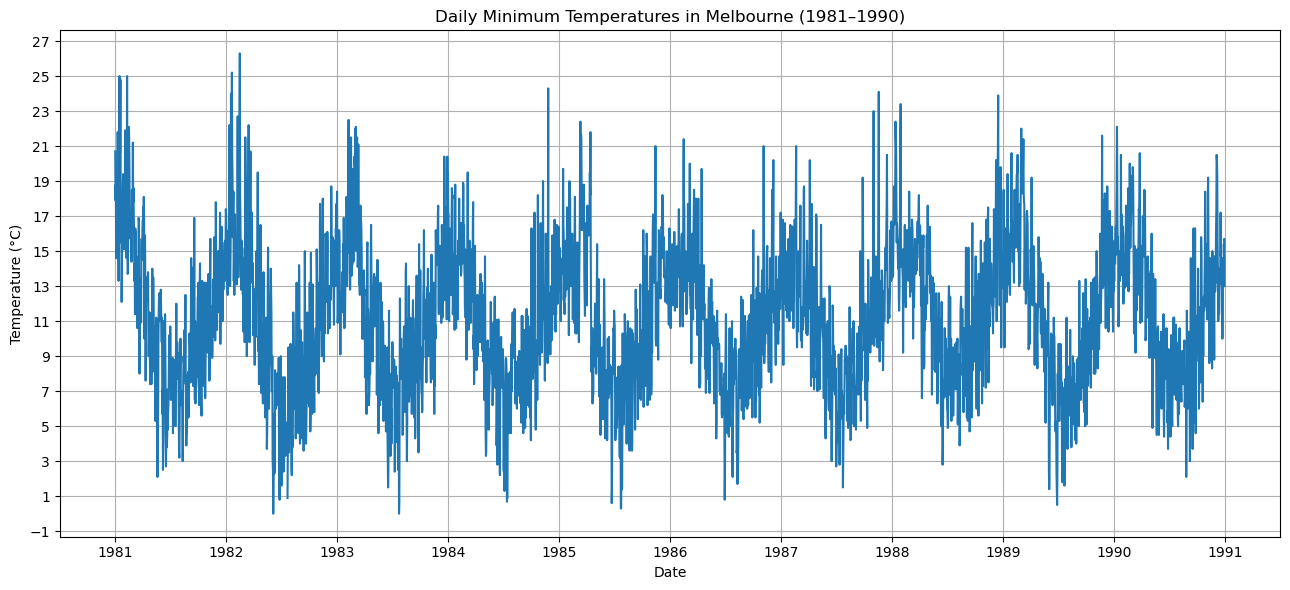

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

rcParams['figure.figsize'] = (13, 6)

plt.plot(ts)

# tsÏùò ÏµúÏÜåÍ∞íÎ≥¥Îã§ 1ÏûëÍ≤å, ÏµúÎåÄÍ∞íÎ≥¥Îã§ 1ÌÅ¨Í≤å, Í∞ÑÍ≤©ÏùÄ 2Î°ú yÏ∂ï ÎààÍ∏àÏùÑ ÎßåÎì†Îã§.
yticks = np.arange(int(ts.min()) - 1, int(ts.max()) + 2, 2)
plt.yticks(yticks)

plt.title("Daily Minimum Temperatures in Melbourne (1981‚Äì1990)")
plt.xlabel("Date")
plt.ylabel("Temperature (¬∞C)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
- Î™®Îëê ÏÇ≠Ï†ú
- Î≥¥Í∞Ñ ‚úÖ

In [26]:
ts[ts.isna()]

Date
1982-07-20   NaN
1982-07-21   NaN
1984-07-14   NaN
Name: Temp, dtype: float64

In [27]:
print(ts.isna().sum())

3


0


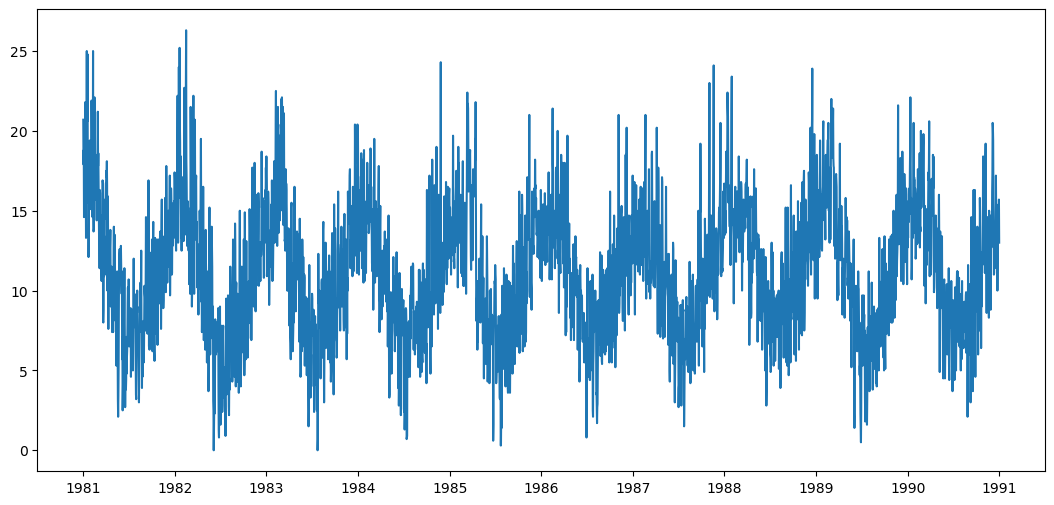

In [28]:
ts=ts.interpolate(method='time')
print(ts.isna().sum())
plt.plot(ts)

### ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÏùºÏ†ïÌïú ÌèâÍ∑†, Î∂ÑÏÇ∞, ÏûêÍ∏∞Í≥µÎ∂ÑÏÇ∞Ïùò Ìå®ÌÑ¥Ïù¥ ÎÇòÌÉÄÎÇòÎäîÍ∞Ä?

In [47]:
# ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï†ïÏÉÅÏÑ± ÌôïÏù∏ 
# Ïù¥Îèô ÌèâÍ∑† & Ïù¥Îèô ÌëúÏ§ÄÌé∏Ï∞®Î•º ÌÜµÌï¥ ÏãúÍ≥ÑÏó¥Ïùò Î≥ÄÎèôÏÑ±ÏùÑ Î∂ÑÏÑù 

def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ∞ÅÌôî
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

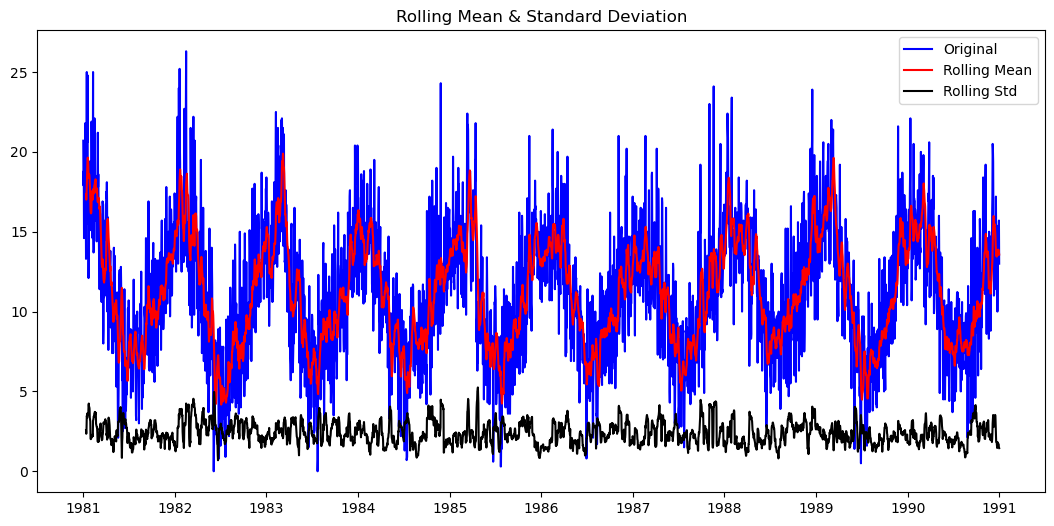

In [32]:
plot_rolling_statistics(ts, window=12)

ÌèâÍ∑†Í∞íÏù¥ ÏãúÍ∞ÑÏóê Îî∞Îùº ÌÅ¨Í≤å Î≥ÄÌïòÏßÄ ÏïäÍ≥†, Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïòÎã§.

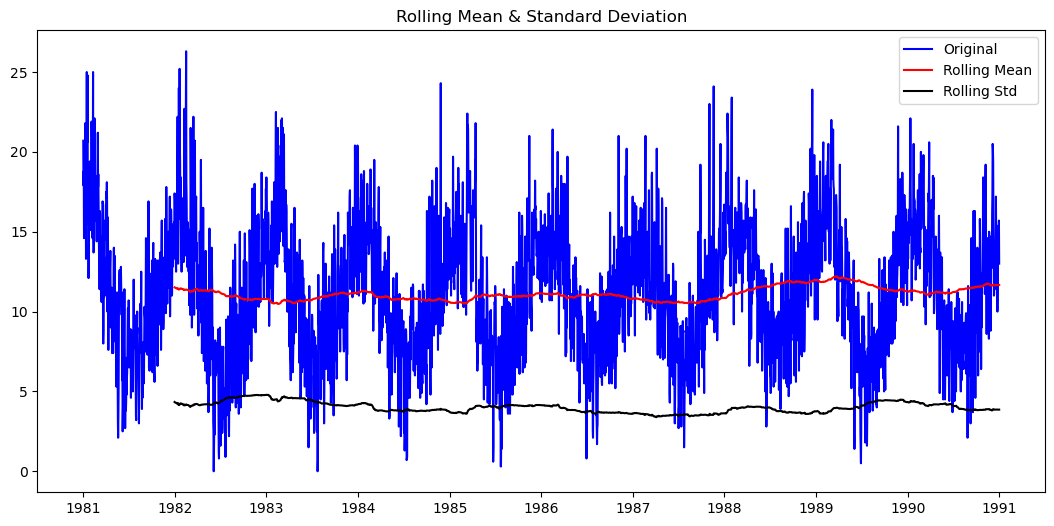

In [48]:
plot_rolling_statistics(ts, window=365) # 1ÎÖÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú 

ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÏãúÍ∞ÑÏóê Îî∞Îùº Í±∞Ïùò Î≥ÄÌïòÏßÄ ÏïäÎäîÎã§.

## Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Î°úÎèÑ ÎπÑÍµêÌï¥Î≥¥Í∏∞

In [35]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, index_col='Month', parse_dates=True).fillna(0)
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

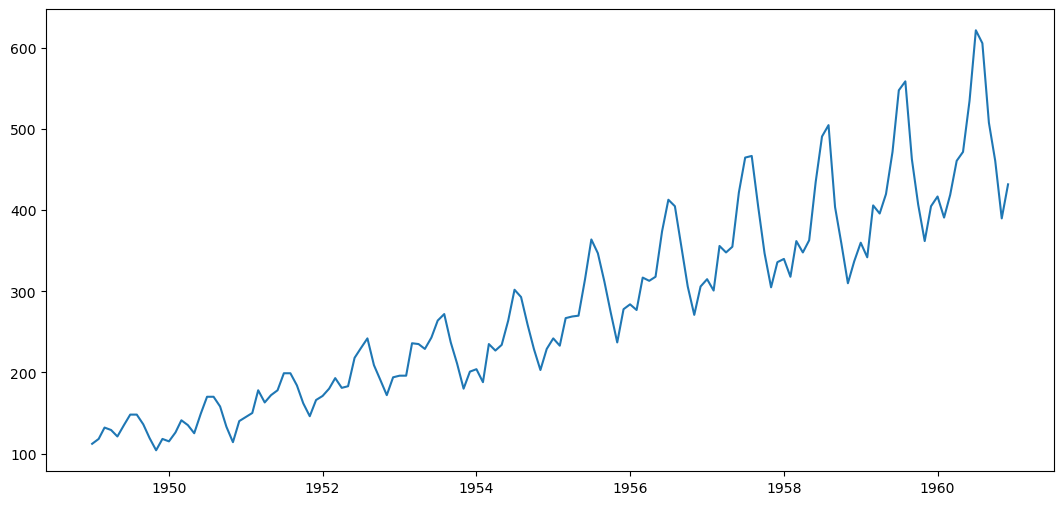

In [36]:
ts2 = df['Passengers']
plt.plot(ts2)

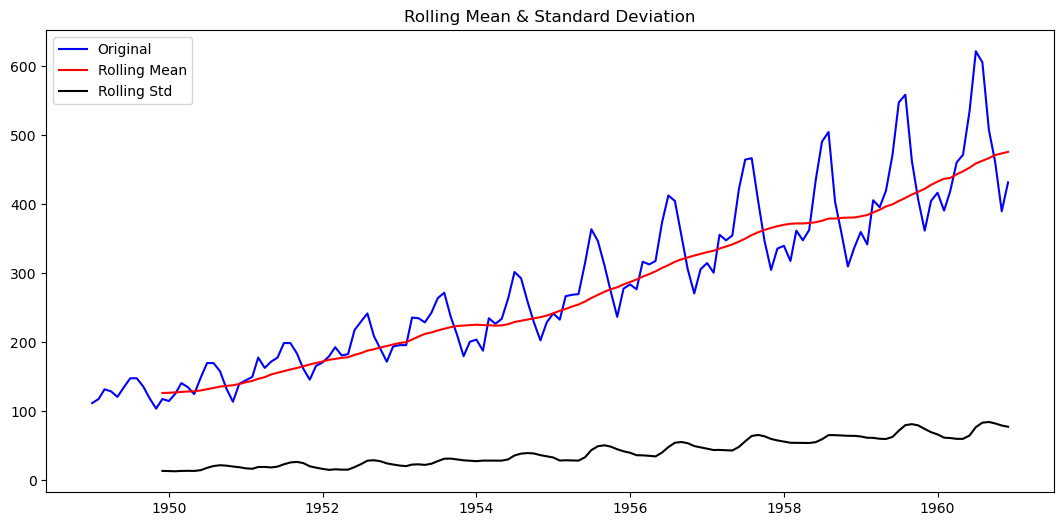

In [37]:
plot_rolling_statistics(ts2, window=12)

Ïù¥Îèô ÌèâÍ∑†Ïù¥ Ï†êÏ∞® ÏÉÅÏäπÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ, ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ†ÏàòÎ°ù ÌèâÍ∑† ÏäπÍ∞ù ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî ÏÉÅÏäπ Ï∂îÏÑ∏Í∞Ä ÏûàÎã§.  
Ïù¥Îèô ÌëúÏ§ÄÌé∏Ï∞®ÎèÑ ÏÇ¥Ïßù ÏÉÅÏäπÎêòÏñ¥ Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ±ÎèÑ Ï†êÏ†ê Ïª§ÏßÄÍ≥† ÏûàÎã§.  
-> Ï†ïÏÉÅÏÑ±Ïùò Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäî Îç∞Ïù¥ÌÑ∞

In [38]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÑúÎìúÎ•º Ìò∏Ï∂ú
    dftest = adfuller(timeseries, autolag='AIC')

    # adfuller Î©îÏÑúÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

### Dickey-Fuller Test Ìï¥ÏÑù ÏöîÎ†π
ÏãúÍ≥ÑÏó¥Ïù¥ Ï†ïÏÉÅÏù∏ÏßÄ ÏïÑÎãåÏßÄÎ•º ÌåêÎã®ÌïòÎäî ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï  
- p-value < 0.05 -> Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥
- Test Statistic < Critical Value(1%,5%,10%) -> Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥

In [41]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                   -4.440522
p-value                           0.000251
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


p-valueÍ∞íÏù¥ 0.05Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÄ Í∏∞Í∞ÅÎêòÍ≥† ÎåÄÎ¶ΩÍ∞ÄÏÑ§Ïù¥ Ï±ÑÌÉùÎêòÏñ¥  
Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§.

In [42]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-valueÍ∞íÏù¥ 0.05Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÍ≤å ÎêòÏóàÏúºÎØÄÎ°ú  
ÎπÑÏ†ïÏÉÅ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§.

## Ï†ïÏÉÅÏÑ± Î≥ÄÌôò
- Î°úÍ∑∏ Î≥ÄÌôòÌïòÏó¨ Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏÉÅÏäπ Ìè≠ Ï§ÑÏù¥Í∏∞

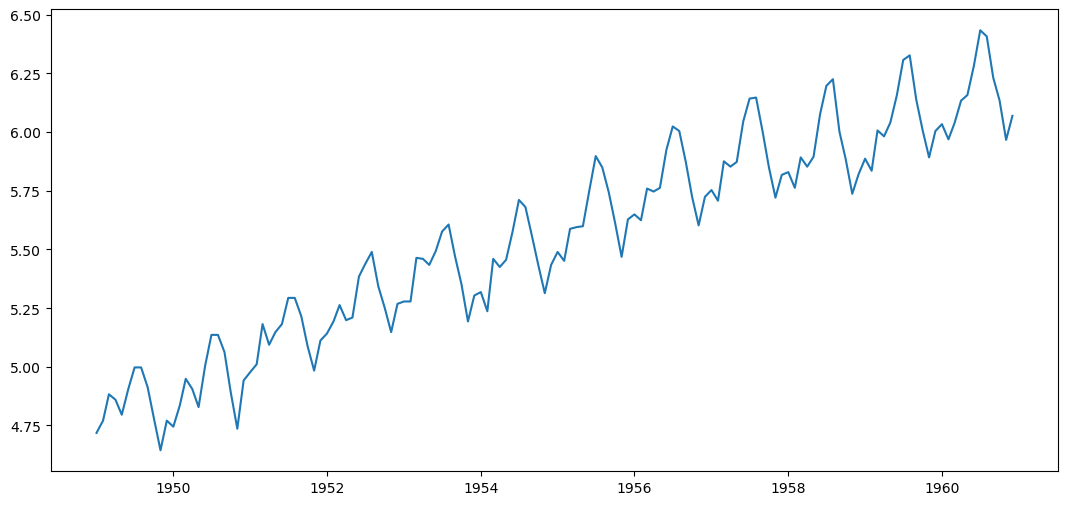

In [43]:
ts_log = np.log(ts2)
plt.plot(ts_log)

Moving AverageÎ•º Í≥ÑÏÇ∞ÌïòÎäî window=12Î°ú Ï†ïÌôïÌïòÍ≤å ÏßÄÏ†ïÌï¥ Ï£ºÏñ¥Ïïº ÌïúÎã§. 

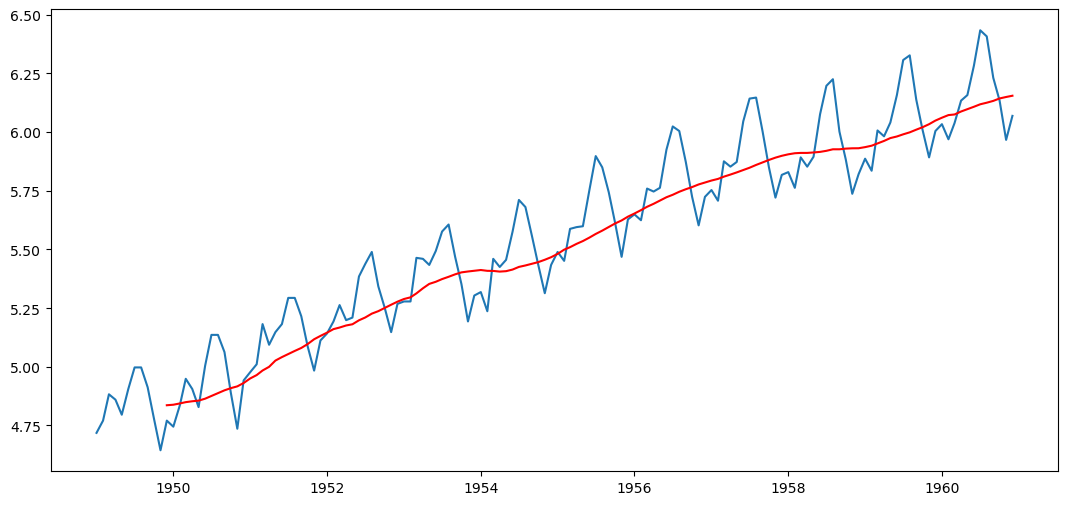

In [45]:
moving_avg = ts_log.rolling(window=12).mean()  # moving averageÍµ¨ÌïòÍ∏∞
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [44]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-valueÍ∞Ä Ï†àÎ∞ò Ïù¥ÏÉÅ Ï§ÑÏñ¥Îì§ÏóàÏßÄÎßå ÏïÑÏßÅ ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÌèâÍ∑†Ïù¥ Í≥ÑÏÜç Ï¶ùÍ∞ÄÌïúÎã§.

## Ï∂îÏÑ∏ Ï†úÍ±∞
- Ïù¥Îèô ÌèâÍ∑† Ï†úÍ±∞

In [50]:
ts_log_moving_avg = ts_log - moving_avg # Î≥ÄÌôîÎüâ Ï†úÍ±∞
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

### Í≤∞Ï∏°Ïπò Ï†úÍ±∞

In [51]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

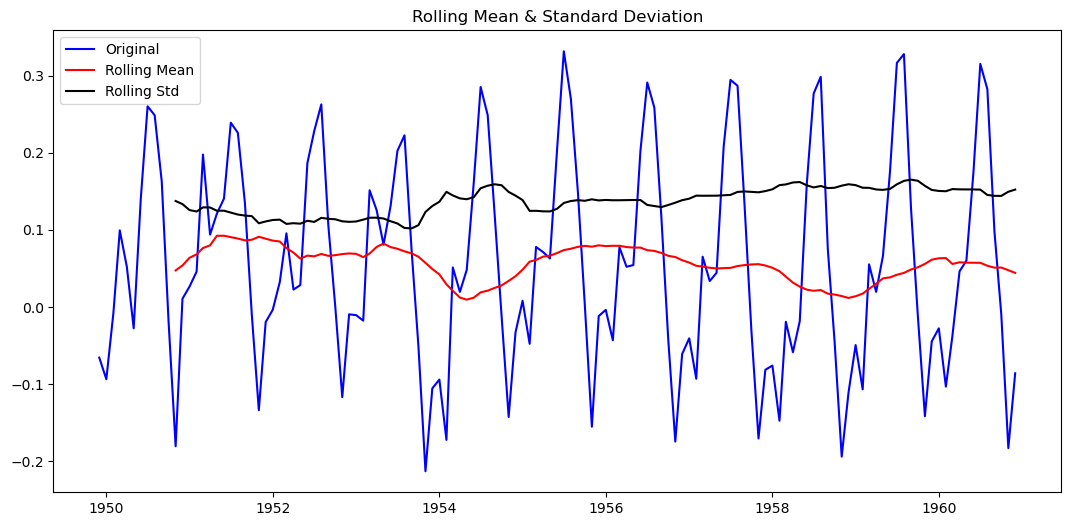

In [52]:
plot_rolling_statistics(ts_log_moving_avg)

In [53]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


Moving AverageÎ•º Í≥ÑÏÇ∞ÌïòÎäî window=12Î°ú Ï†ïÌôïÌïòÍ≤å ÏßÄÏ†ïÌï¥ Ï£ºÏñ¥Ïïº ÌïòÎäîÎç∞  
window=6 ÏùÑ Ï†ÅÏö©ÌïúÎã§Î©¥?

In [55]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

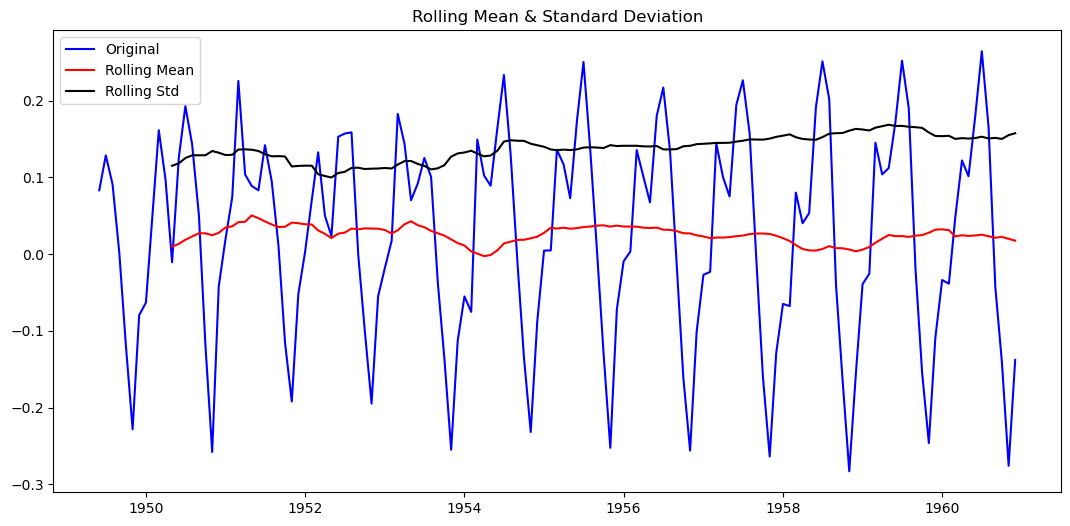

In [56]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [57]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


widnow=6Ïù¥ ÎêòÎ©¥ p-valueÍ∞Ä 0.18Î°ú Ï†ïÏÉÅÏÑ± ÏãúÍ≥ÑÏó¥Ïù¥ÎùºÍ≥† ÎßêÌï† Ïàò ÏóÜÍ≤å ÎêúÎã§.  
moving averageÎ•º Í≥†Î†§Ìï† ÎïåÎäî rolling meanÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌïú window ÌÅ¨Í∏∞Î•º Í≤∞Ï†ïÌïòÎäî Í≤ÉÏù¥ Îß§Ïö∞ Ï§ëÏöîÌïòÎã§.  

## Ï∞®Î∂Ñ
- Í≥ÑÏ†àÏÑ± ÏÉÅÏáÑ

### Ìïú Ïπ∏ ÏãúÌîÑÌä∏Ìïú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

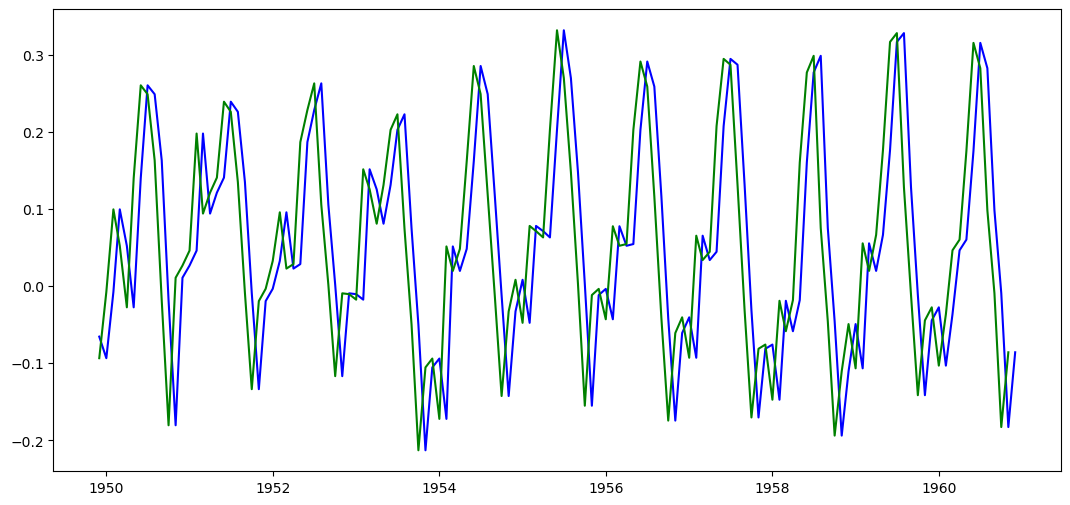

In [58]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift(-1)

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

### Î≥ÄÌôîÎüâ(Ï∞®Î∂Ñ) Í≥ÑÏÇ∞

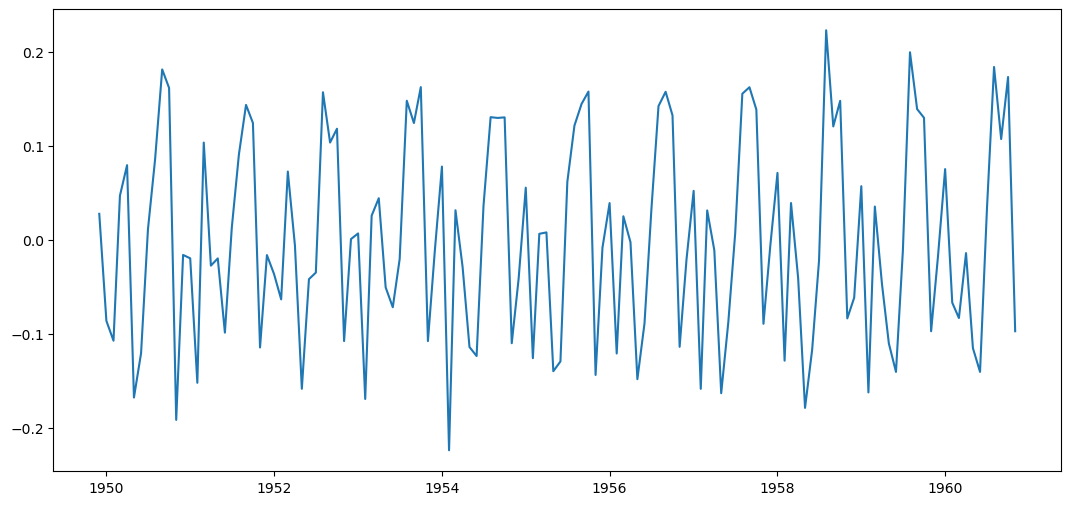

In [59]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

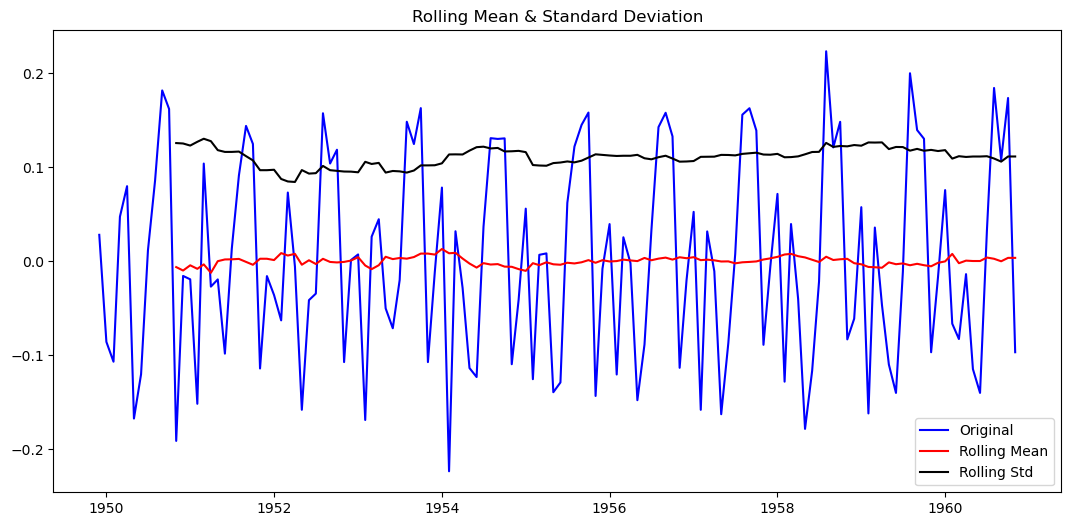

In [60]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [61]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


Î°úÍ∑∏Ìï®Ïàò Î≥ÄÌôòÌïú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïù¥ÎèôÌèâÍ∑†ÏùÑ Îπº Ï£ºÏñ¥ Ï∂îÏÑ∏Î•º Ï†úÍ±∞ÌïòÍ≥† ÎÇú ÏãúÍ≥ÑÏó¥ÏóêÎã§Í∞Ä  
1Ï∞® Ï∞®Î∂ÑÏùÑ Ï†ÅÏö©ÌïòÏó¨ Í≥ÑÏ†àÏÑ± Ìö®Í≥ºÎ•º Îã§ÏÜå ÏÉÅÏáÑÏãúÏº∞Îã§.  
  
p-valueÍ∞íÏù¥ 0.05Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† ÎåÄÎ¶ΩÍ∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌï† Ïàò ÏûàÎã§.  
Ï¶â, Ï†ïÏÉÅÏÑ± Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§.  

Îç∞Ïù¥ÌÑ∞Ïóê Îî∞ÎùºÏÑúÎäî 2Ï∞® Ï∞®Î∂Ñ, 3Ï∞® Ï∞®Î∂ÑÏùÑ Ï†ÅÏö©ÌïòÎ©¥ ÎçîÏö± p-valueÍ∞íÏùÑ ÎÇÆÏ∂ú Ïàò ÏûàÎã§.

## ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ time series decomposition
statsmodels ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏïàÏóêÎäî seasonal_decompose Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ ÏãúÍ≥ÑÏó¥ ÏïàÏóê Ï°¥Ïû¨ÌïòÎäî trend, seasonalityÎ•º ÏßÅÏ†ë Î∂ÑÎ¶¨  
ÏúÑÏóêÏÑú ÏûëÏóÖÌñàÎçò Ïù¥Îèô ÌèâÍ∑† Ï†úÍ±∞, Ï∂îÏÑ∏ Ï†úÍ±∞ Îì±ÏùÑ Í±∞ÏπòÏßÄ ÏïäÍ≥†ÎèÑ Í∞ÑÍ≤∞ÌïòÍ≤å ÌëúÌòÑÌï† Ïàò ÏûàÎã§.

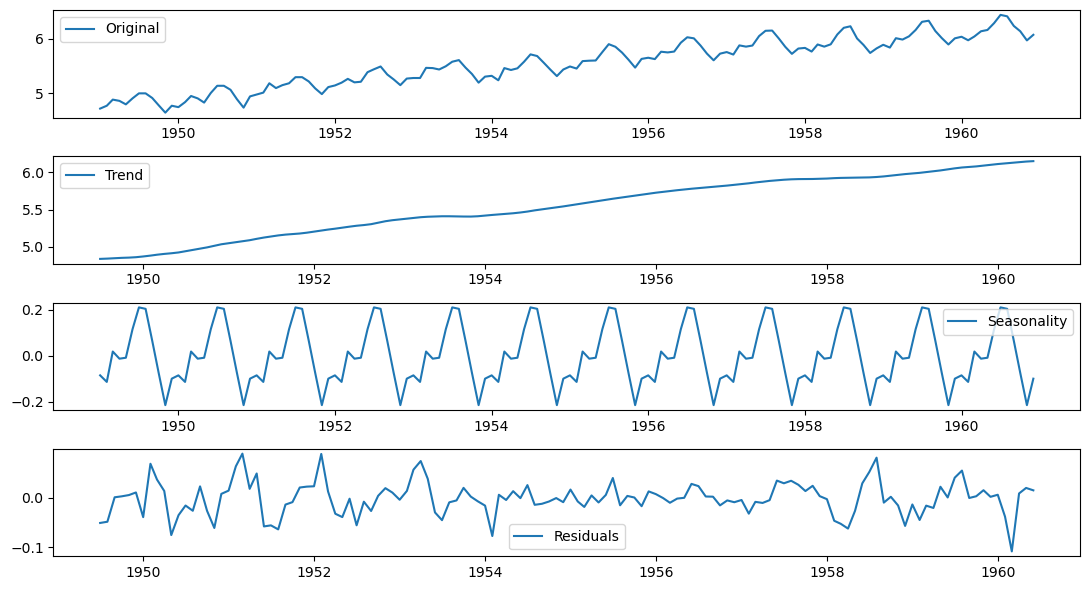

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # Ï∂îÏÑ∏(ÏãúÍ∞Ñ Ï∂îÏù¥Ïóê Îî∞Îùº ÎÇòÌÉÄÎÇòÎäî ÌèâÍ∑†Í∞í Î≥ÄÌôî )
seasonal = decomposition.seasonal # Í≥ÑÏ†àÏÑ±(Ìå®ÌÑ¥Ïù¥ ÌååÏïÖÎêòÏßÄ ÏïäÏùÄ Ï£ºÍ∏∞Ï†Å Î≥ÄÌôî)
residual = decomposition.resid # ÏõêÎ≥∏(Î°úÍ∑∏Î≥ÄÌôòÌïú) - Ï∂îÏÑ∏ - Í≥ÑÏ†àÏÑ±

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

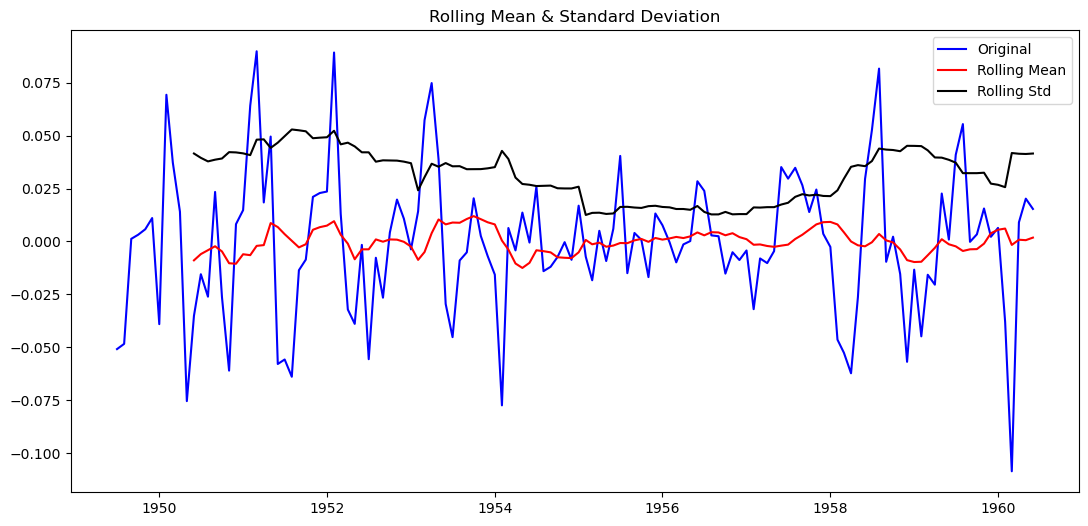

In [63]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [64]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [69]:
# p-value 2.885059e-08 -> 0.00000002885059

Ï†ïÏÉÅÏÑ± Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† Î≥º Ïàò ÏûàÎã§.

## ARIMA
- Î™®Ïàò p, d, q -> ACF or PACF Í∏∞Î≤ï  
- ACFÎ•º ÌÜµÌï¥ MA Î™®Îç∏Ïùò ÏãúÏ∞® qÎ•º Í≤∞Ï†ïÌïòÍ≥†, PACFÎ•º ÌÜµÌï¥ AR Î™®Îç∏Ïùò ÏãúÏ∞® pÎ•º Í≤∞Ï†ï
- p ÏôÄ q Îäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú p + q < 2, p * q = 0 Ïù∏ Í∞íÏùÑ ÏÇ¨Ïö©ÌïòÎäîÎç∞, Ïù¥Îäî p ÎÇò q Ï§ë ÌïòÎÇòÎäî 0Ïù¥ÎùºÎäî ÎúªÏù¥Îã§.  
  Ïù¥Î†áÍ≤å ÌïòÎäî Ïù¥Ïú†Îäî ÎßéÏùÄ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ARÏù¥ÎÇò MA Ï§ë ÌïòÎÇòÏùò Í≤ΩÌñ•Îßå Í∞ÄÏßÄÍ∏∞ ÎïåÎ¨∏

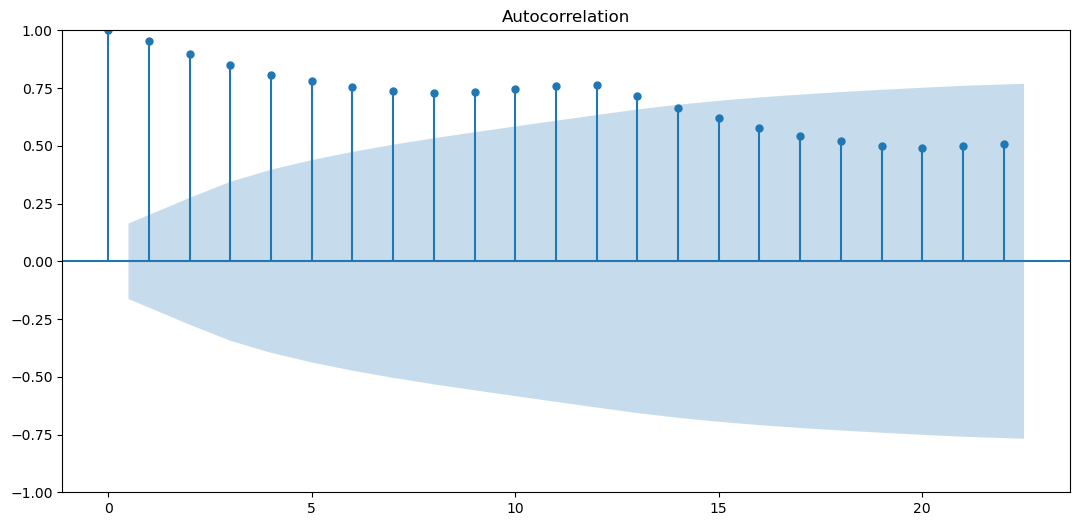

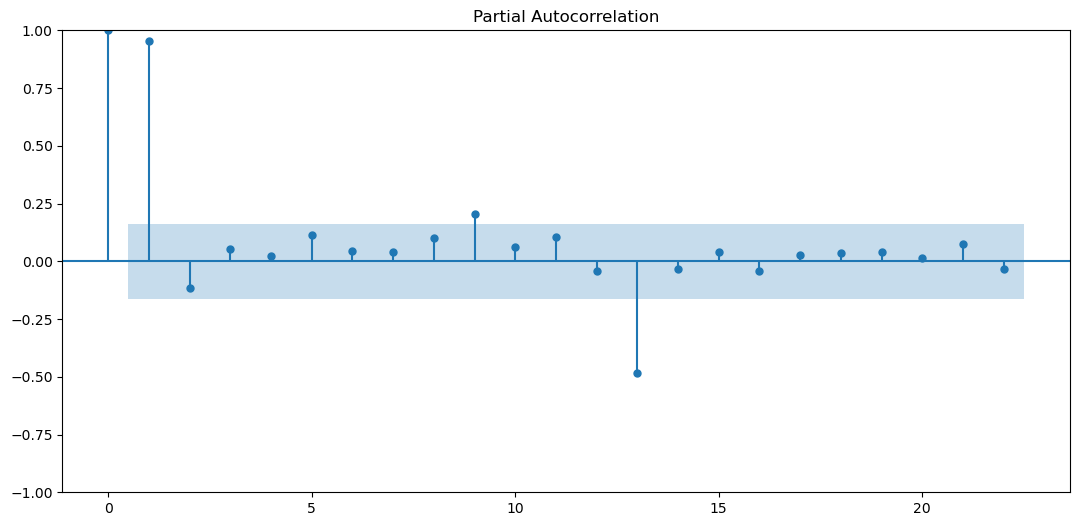

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

ACFÎäî Ï†êÏ∞®Ï†ÅÏúºÎ°ú Í∞êÏÜåÌïòÍ≥† ÏûàÏñ¥ÏÑú AR(1) Î™®Îç∏Ïóê Ïú†ÏÇ¨Ìïú ÌòïÌÉúÎ•º Î≥¥Ïù¥Í≥† ÏûàÎã§.  
qÏóê ÎåÄÌï¥ÏÑúÎäî Ï†ÅÌï©Ìïú Í∞íÏù¥ ÏóÜÏñ¥ Î≥¥Ïù∏Îã§. MAÎ•º Í≥†Î†§Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§Î©¥ q=0ÏúºÎ°ú Îëò Ïàò ÏûàÎã§.  

PACF Í∑∏ÎûòÌîÑÎ•º Î≥º Îïå p=1Ïù¥ Îß§Ïö∞ Ï†ÅÌï©ÌïòÎã§. pÍ∞Ä 2 Ïù¥ÏÉÅÏù∏ Íµ¨Í∞ÑÏóêÏÑú PACFÎäî Í±∞Ïùò 0Ïóê Í∞ÄÍπåÏõåÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.  
ÌïòÏßÄÎßå qÎ•º Î∞îÍøî Í∞ÄÎ©¥ÏÑú ÌôïÏù∏Ìï¥ Î≥¥Îäî Í≤ÉÎèÑ Ï¢ãÍ≤†Îã§.

### 1Ï∞® Ï∞®Î∂Ñ

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


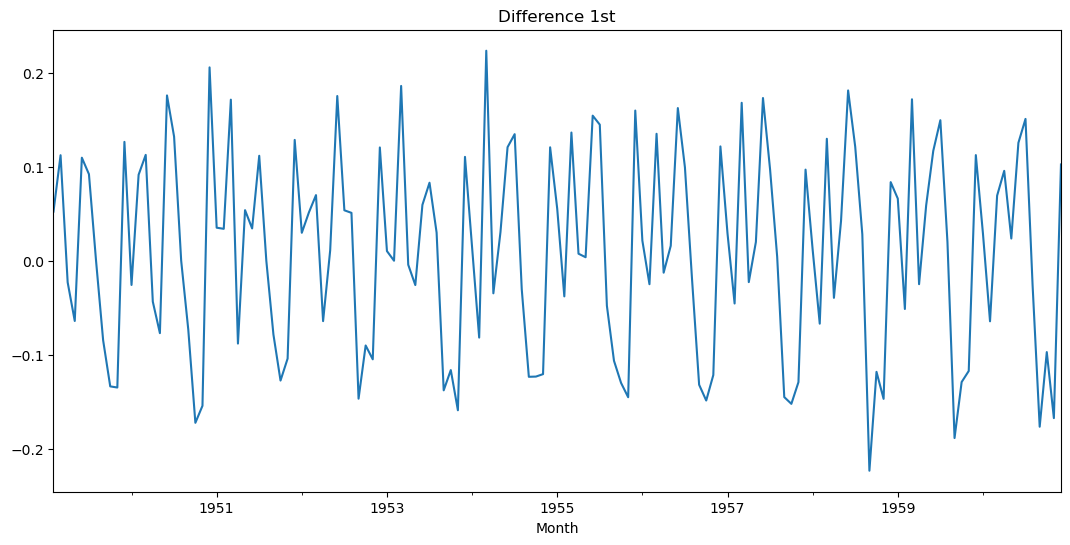

In [71]:
# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

### 2Ï∞® Ï∞®Î∂Ñ

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


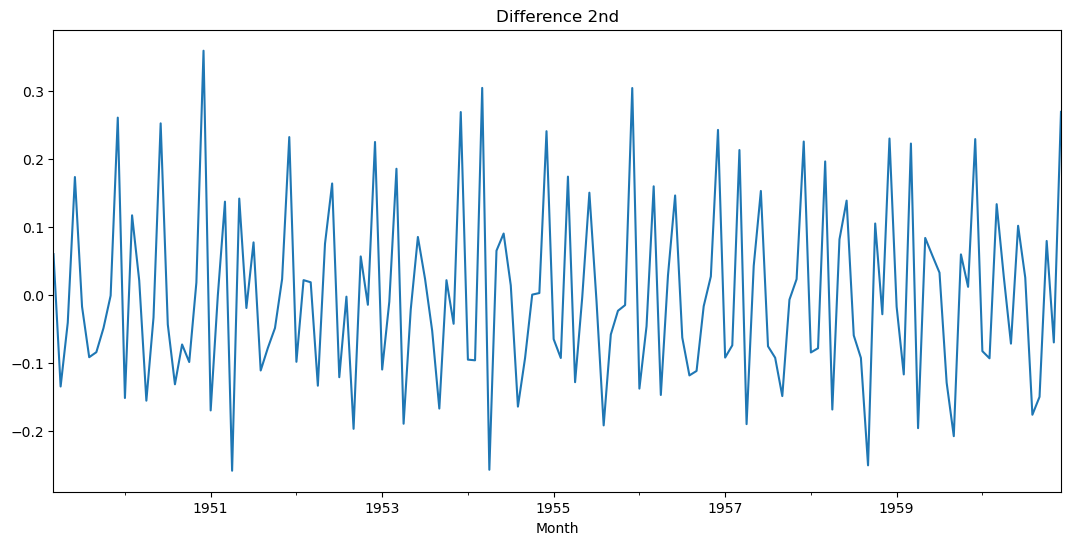

In [75]:
# 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [73]:
# p-value  0.0000000000007419305

1Ï∞® Ï∞®Î∂ÑÏùÑ Íµ¨ÌñàÏùÑ Îïå ÏïΩÍ∞Ñ Ïï†Îß§Ìïú ÏàòÏ§ÄÏùò ÏïàÏ†ïÌôî ÏÉÅÌÉúÎ•º Î≥¥ÏòÄÎã§.  
2Ï∞® Ï∞®Î∂ÑÏùÑ Íµ¨ÌñàÏùÑ ÎïåÎäî ÌôïÏã§Ìûà ÏïàÏ†ïÌôî ÏÉÅÌÉúÏòÄÏßÄÎßå Ïù¥Î≤à Í≤ΩÏö∞ÏóêÎäî d=1Î°ú Î®ºÏ†Ä ÏãúÎèÑÌï¥ Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§.  
d Í∞íÎèÑ Î∞îÍøî Í∞ÄÎ©¥ÏÑú ÏµúÏ†ÅÏùò Í∞íÏùÑ Ï∞æÏïÑÎ≥¥Í∏∞Î•º Í∂åÌï©ÎãàÎã§.  
(Ïó¨Í∏∞ÏÑú dÍ∞íÏùÄ Ï∞®Î∂ÑÏùò ÌöüÏàòÎ•º ÎßêÌï®)

## ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

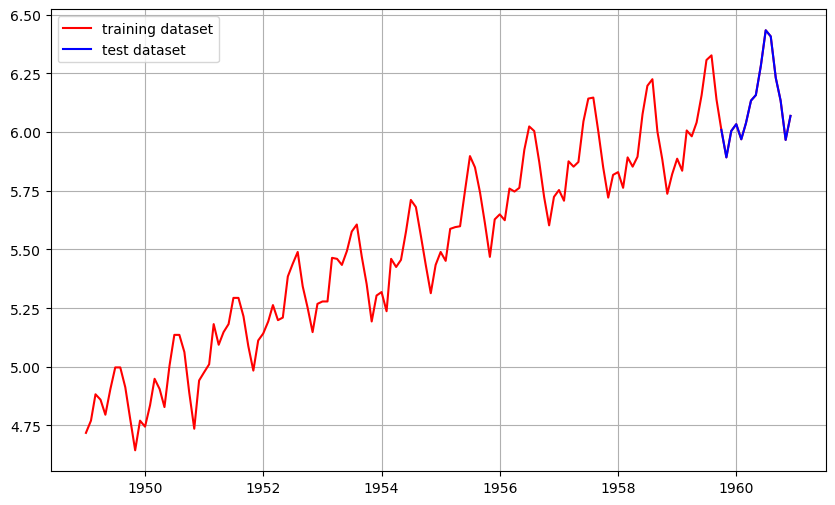

In [76]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [77]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


In [78]:
import warnings
warnings.filterwarnings('ignore') #Í≤ΩÍ≥† Î¨¥Ïãú

from statsmodels.tsa.arima.model import ARIMA
# Î™®Îç∏ ÏÉùÏÑ±
model = ARIMA(train_data, order=(14, 1, 0)) # Î™®ÏàòÎäî Ïù¥Ï†Ñ Í∑∏ÎûòÌîÑÎ•º Ï∞∏Í≥†
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.951
Date:                Tue, 27 May 2025   AIC                           -409.902
Time:                        12:23:57   BIC                           -367.121
Sample:                    01-01-1949   HQIC                          -392.520
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2789      0.081     -3.444      0.001      -0.438      -0.120
ar.L2         -0.0134      0.108     -0.123      0.902      -0.226       0.199
ar.L3         -0.0015      0.046     -0.032      0.9

In [79]:
import warnings
warnings.filterwarnings('ignore') #Í≤ΩÍ≥† Î¨¥Ïãú

from statsmodels.tsa.arima.model import ARIMA
# Î™®Îç∏ ÏÉùÏÑ±
model = ARIMA(train_data, order=(13, 1, 0)) # Î™®ÏàòÎäî Ïù¥Ï†Ñ Í∑∏ÎûòÌîÑÎ•º Ï∞∏Í≥†
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(13, 1, 0)   Log Likelihood                 219.662
Date:                Tue, 27 May 2025   AIC                           -411.325
Time:                        12:29:50   BIC                           -371.397
Sample:                    01-01-1949   HQIC                          -395.102
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2900      0.072     -4.031      0.000      -0.431      -0.149
ar.L2         -0.0636      0.056     -1.135      0.256      -0.173       0.046
ar.L3       7.285e-05      0.044      0.002      0.9

AIC, BIC Îäî Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå.  
Log LikelihoodÎäî Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Ï¢ãÏùå.  

ACFÎäî Ï≤úÏ≤úÌûà Ï§ÑÍ≥†, PACFÎäî ÌäπÏ†ï ÏãúÏ†êÏóêÏÑú Í∏âÍ≤©Ìûà ÎÅäÍπÄ ‚Üí AR Î™®Îç∏Ïù¥ Ï†ÅÌï©  
Îî∞ÎùºÏÑú ARIMA(13,1,0) ÌòπÏùÄ Ï∞®Î∂ÑÎêú Îç∞Ïù¥ÌÑ∞Î°ú AR(13)Ïù¥ Ï†ÅÌï©ÌïòÎã§Í≥† ÌåêÎã®.  

üîç PACF Í∑∏ÎûòÌîÑ Î∂ÑÏÑù Îã§Ïãú Î≥¥Í∏∞  
lag 1, 2Îäî ÌôïÏã§Ìûà ÎÜíÍ≥† Ïú†ÏùòÎØ∏Ìï® (Í∏∞ÎåÄÌïú ÎåÄÎ°ú).  
  
Í∑∏ Ïù¥ÌõÑ ÎåÄÎ∂ÄÎ∂ÑÏùÄ ÌååÎûÄ Ïã†Î¢∞Íµ¨Í∞Ñ ÏïàÏóê Îì§Ïñ¥Í∞ê ‚Üí ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.  

Îã§Îßå, lag 13ÏóêÏÑú ÏùåÏùò Î∞©Ìñ•ÏúºÎ°ú Ïã†Î¢∞Íµ¨Í∞Ñ Î∞ñÏúºÎ°ú ÌäÄÏñ¥ÎÇòÏò¥  
‚Üí Ïù¥Í±¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú ÌîºÌÅ¨Ïù¥ÎØÄÎ°ú p=14ÏôÄ p=13ÏùÑ ÎπÑÍµêÌï¥Î≥¥Í∏∞Î°ú Ìï®.


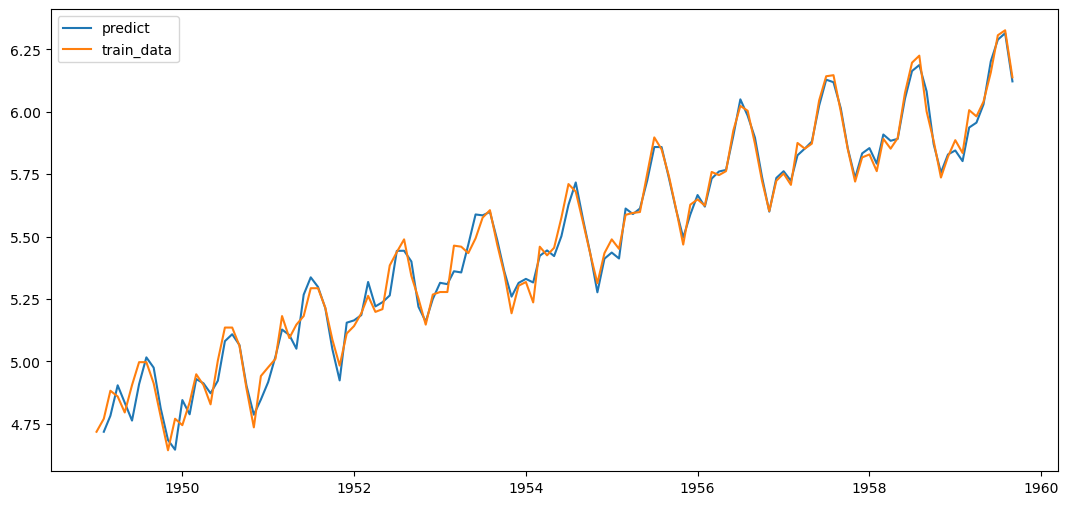

In [80]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

## Î°úÍ∑∏ Î≥ÄÌôò -> ÏßÄÏàò Î≥ÄÌôòÌïòÏó¨ Ï†ïÌôïÌïú Ïò§Ï∞® Í≥ÑÏÇ∞

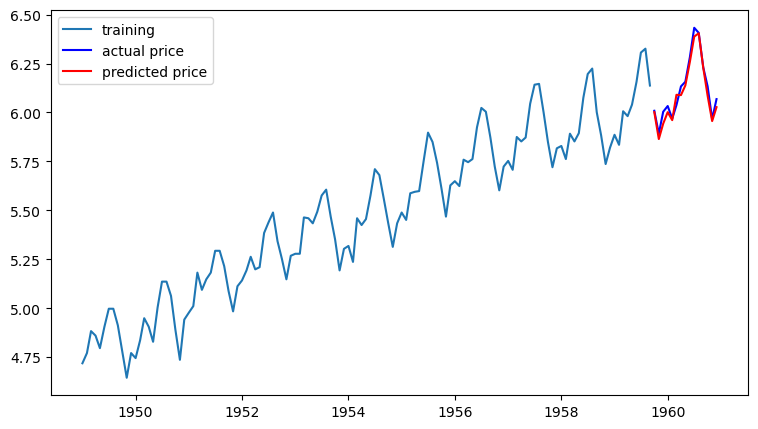

In [86]:
model = ARIMA(train_data, order=(14, 1, 0))  # pÍ∞íÏùÑ 14ÏúºÎ°ú ÌÖåÏä§Ìä∏
fitted_m = model.fit()
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  235.56810381733703
MAE:  12.584816877721618
RMSE:  15.348228035096984
MAPE: 2.77%


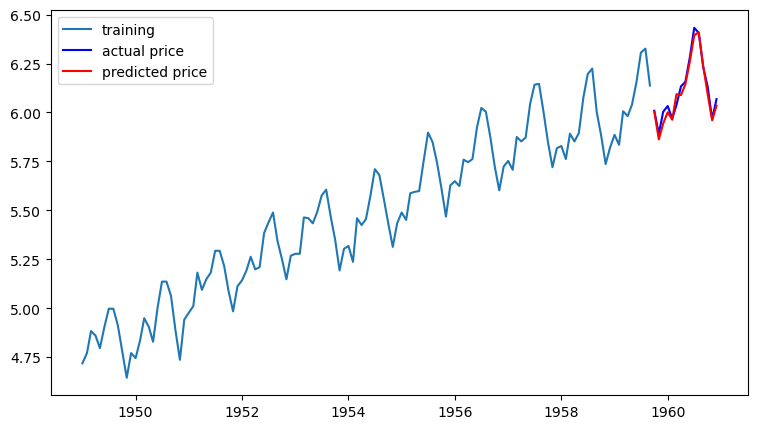

In [88]:
model = ARIMA(train_data, order=(13, 1, 0))  # pÍ∞íÏùÑ 13ÏúºÎ°ú ÌÖåÏä§Ìä∏
fitted_m = model.fit()
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  203.20356364739277
MAE:  11.627992109415382
RMSE:  14.25494874236287
MAPE: 2.57%


p=14ÏùÑ Ï§Ñ Í≤ΩÏö∞ MAPEÍ∞Ä 2.77%Ïù¥ÏßÄÎßå p=13ÏùÑ Ï§Ñ Í≤ΩÏö∞ MAPEÍ∞Ä 2.57%Î°ú Îçî ÎÇ¥Î†§Í∞ÑÎã§.